In [3]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import import_ipynb


In [4]:
num_of_classes = 4
image_size = 224
batch_size = 32
train_samples = 2000  # replace with your actual size of the training set
validation_samples = 500  # replace with your actual size of the validation set
epochs = 10
train_directory = '/Users/lafity101/Downloads/output'


In [5]:
# Load the ResNet50 base model, pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False)

# Freeze the layers of the base_model
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_of_classes, activation='softmax')(x) 
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


2023-11-06 17:21:14.722117: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2023-11-06 17:21:14.722141: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-11-06 17:21:14.722146: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-11-06 17:21:14.722183: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-06 17:21:14.722200: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2 
)

train_generator = data_gen.flow_from_directory(
    train_directory,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Set as training data
)

validation_generator = data_gen.flow_from_directory(
    train_directory,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

Found 2084 images belonging to 4 classes.
Found 519 images belonging to 4 classes.


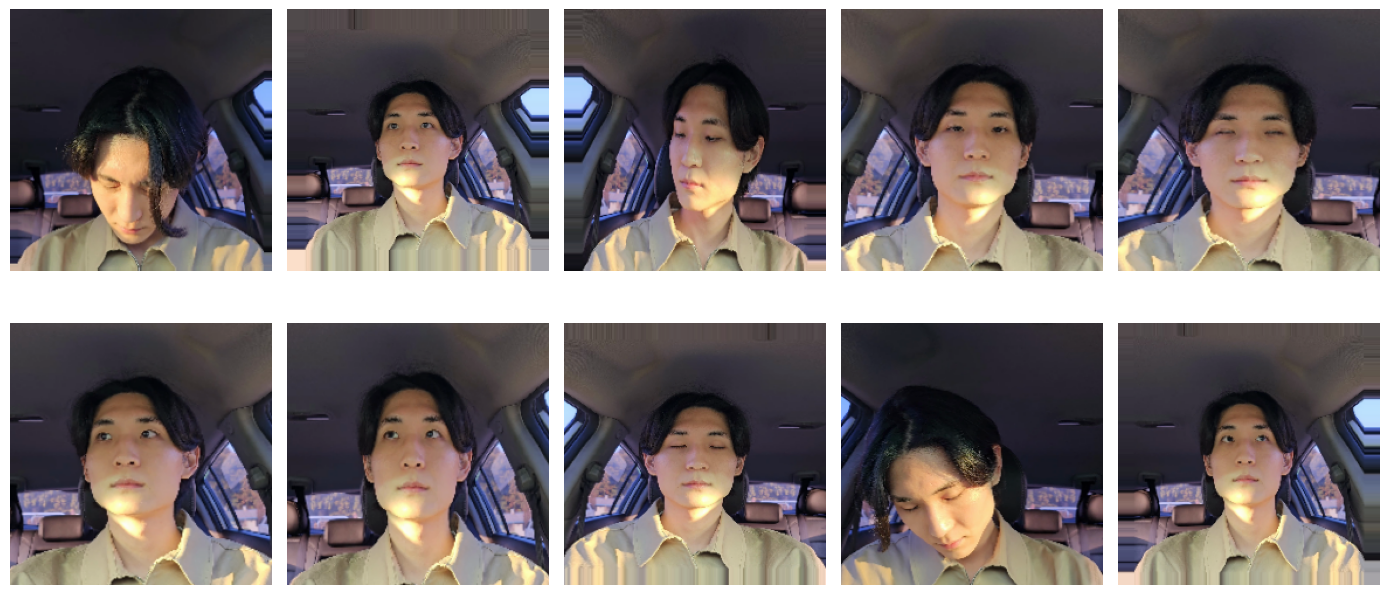

In [27]:
from utils import debug_augmented_images

debug_augmented_images(train_generator)

In [8]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size
)

# model.save('path_to_my_model.h5')

Epoch 1/10


2023-11-06 17:21:20.124088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


62/62 [==============================] - 90s 1s/step - loss: 1.3765 - accuracy: 0.3282 - val_loss: 1.3349 - val_accuracy: 0.3292
Epoch 2/10
62/62 [==============================] - 84s 1s/step - loss: 1.3068 - accuracy: 0.3410 - val_loss: 1.3099 - val_accuracy: 0.3292
Epoch 3/10
62/62 [==============================] - 83s 1s/step - loss: 1.2919 - accuracy: 0.3563 - val_loss: 1.3369 - val_accuracy: 0.3417
Epoch 4/10
62/62 [==============================] - 83s 1s/step - loss: 1.2530 - accuracy: 0.3763 - val_loss: 1.2743 - val_accuracy: 0.3479
Epoch 5/10
62/62 [==============================] - 81s 1s/step - loss: 1.2182 - accuracy: 0.4187 - val_loss: 1.3603 - val_accuracy: 0.3396
Epoch 6/10
62/62 [==============================] - 81s 1s/step - loss: 1.2109 - accuracy: 0.4361 - val_loss: 1.2656 - val_accuracy: 0.3812
Epoch 7/10
62/62 [==============================] - 83s 1s/step - loss: 1.1682 - accuracy: 0.4509 - val_loss: 1.2285 - val_accuracy: 0.4229
Epoch 8/10
62/62 [=============

In [36]:
from utils import debug_model_prediction

debug_model_prediction(validation_generator, model)


ImportError: cannot import name 'debug_model_prediction' from 'utils' (utils.ipynb)

In [9]:
# TBD:
#
# 1. Preprocess - Extract the face before putting it as an input. - haar cascade?
# 2. Done: Find a way to debug & visualize. - rescale
# 3. Remove the pre-trained model? 
# 4. Polish image data - retake
# 5. Shear & Zoom?? 
